In [1]:
import numpy as np
import pandas as pd

**Q1. Downloading the data**

In [38]:
df = pd.read_parquet('./data/fhv_tripdata_2021-01.parquet')
len(df)

1154112

**Q2. Computing duration**

In [39]:
df['duration'] = df.dropOff_datetime - df.pickup_datetime
df.duration = df.duration.dt.total_seconds() / 60
df.duration.mean()

19.167224093791006

<Axes: xlabel='duration', ylabel='Density'>

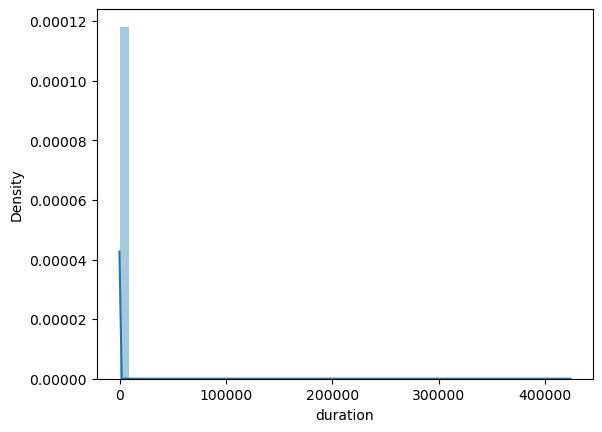

In [5]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

sns.distplot(df.duration)

In [40]:
old_len = len(df)
df = df[(df.duration >= 1) & (df.duration <= 60)]
new_len = len(df)
print(f'There are {old_len - new_len} records I dropped')
percentage_drop = (old_len - new_len) / old_len * 100
print(f'The percentage drop is {round(percentage_drop,2)}%')

There are 44286 records I dropped
The percentage drop is 3.84%


**Q3. Missing values**

In [19]:
print(df.isnull().sum())
percentage_null = df.isnull().sum() / len(df) * 100
print(percentage_null)

dispatching_base_num            0
pickup_datetime                 0
dropOff_datetime                0
PUlocationID               927008
DOlocationID               147907
SR_Flag                   1109826
Affiliated_base_number        773
duration                        0
dtype: int64
dispatching_base_num        0.000000
pickup_datetime             0.000000
dropOff_datetime            0.000000
PUlocationID               83.527328
DOlocationID               13.327044
SR_Flag                   100.000000
Affiliated_base_number      0.069651
duration                    0.000000
dtype: float64


In [41]:
categorical = ['PUlocationID', 'DOlocationID']
df[categorical] = df[categorical].fillna(-1).astype('int')
df.isnull().sum()

dispatching_base_num            0
pickup_datetime                 0
dropOff_datetime                0
PUlocationID                    0
DOlocationID                    0
SR_Flag                   1109826
Affiliated_base_number        773
duration                        0
dtype: int64

**Q4. One-hot encoding**

In [29]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [33]:
df[categorical] = df[categorical].astype('str')
train_dicts = df[categorical].to_dict(orient='records')
train_dicts[:10]

[{'PUlocationID': '-1', 'DOlocationID': '-1'},
 {'PUlocationID': '-1', 'DOlocationID': '-1'},
 {'PUlocationID': '-1', 'DOlocationID': '72'},
 {'PUlocationID': '-1', 'DOlocationID': '61'},
 {'PUlocationID': '-1', 'DOlocationID': '71'},
 {'PUlocationID': '-1', 'DOlocationID': '91'},
 {'PUlocationID': '-1', 'DOlocationID': '39'},
 {'PUlocationID': '-1', 'DOlocationID': '37'},
 {'PUlocationID': '-1', 'DOlocationID': '39'},
 {'PUlocationID': '-1', 'DOlocationID': '72'}]

In [34]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
X_train.shape

(1109826, 525)

In [37]:
len(dv.feature_names_)

525

**Q5. Training the model**

In [43]:
y_train = df.duration.values
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred = model.predict(X_train)
mean_squared_error(y_pred, y_train, squared=False)

10.52851938906961

**Q6. Evaluating the model**

In [51]:
categorical = ['PUlocationID', 'DOlocationID']

def read_data(file_name):
    df = pd.read_parquet(file_name)
    df['duration'] = df.dropOff_datetime - df.pickup_datetime
    df.duration = df.duration.dt.total_seconds() / 60
    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()
    df[categorical] = df[categorical].fillna(-1).astype('int').astype('str')
    return df

In [ ]:
df_val = read_data('./data/fhv_tripdata_2021-02.parquet')
val_dicts = df[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_val_pred = model.predict(X_val)
y_val = df_val.duration.values
mean_squared_error(y_val, y_val_pred, squared=False)